In [77]:
import matplotlib.pylab as plt
import xarray as xr
import cartopy
import cartopy.feature as cfeature
from pyresample import geometry
from pyresample.utils import parse_area_file
from glob import glob
import numpy as np
import re
from cmocean import cm

plt.rcParams['figure.facecolor'] = 'white'


# proj_dict = {'proj': 'merc', 'lon_0': 0, 'a': 6378137, 'units': 'm', 'x_0': 933300, 'y_0': -7279200}
# area_def = geometry.AreaDefinition('IrishSea', 'Irish Sea 300m', 'epsg:3857', proj_dict,
#                                 400, 400, [-60000, -60000,  60000,  60000])
# crs = area_def.to_cartopy_crs()

area_def = parse_area_file('/home/jlavelle/code/github_twm/eo_chain/eo_chain/data/areas/resample_areas.yml', 'ireland')[0]
crs = area_def.to_cartopy_crs()
crs = cartopy.crs.Mercator(central_longitude=0.0, min_latitude=-80.0, 
                           max_latitude=84.0, globe=None, latitude_true_scale=None, false_easting=-7, false_northing=53, scale_factor=None)

/home/jlavelle/.local/lib/python3.8/site-packages/pyresample/utils/__init__.py:58: UserWarning: 'parse_area_file' has moved, import it with 'from pyresample import parse_area_file'
  warnings.warn("'parse_area_file' has moved, import it with 'from pyresample import parse_area_file'")
/home/jlavelle/anaconda3/envs/map/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


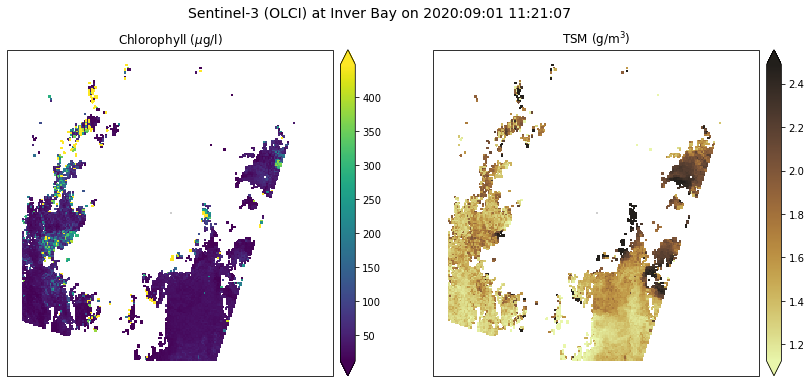

In [81]:
# (arr + offset)/scale
def create_plot(ds, ax, title, cmap='viridis', logtolinear=False):
    if ds_chl.offset in ['nan', 'inf']:
        offset = 0
    else:
        offset = np.float(ds.offset)
    if ds_chl.scale in ['nan', 'inf']:
        scale = 0
    else:
        scale = np.float(ds_chl.scale)
    ds_v = (ds.isel(band=0) * scale) - offset
    if logtolinear:
        ds_v = 10**ds_v
    img = ds_v.where(ds.isel(band=1)).plot(ax=ax, cmap=cmap, cbar_kwargs={'fraction':0.046, 'pad':0.02}, robust=True)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='0.8'))
    ax.add_feature(cfeature.BORDERS)
    ax.set_title(title)

    return fig

def create_rgb(ds_rgb, ax2):
    ds_rgb.plot.imshow(rgb='band', ax=ax2, robust=False)
    ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='0.8'))
    ax2.add_feature(cfeature.BORDERS)
    ax2.set_title(f'Ocean Colour RGB')
    

for fn_chl in glob('/tmp/product/product/2020/09/01/twm-eo_*20200901*chl_nn.tif'):
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw=dict(projection=crs), figsize=(14, 6))
#     fig, ax1 = plt.subplots(ncols=1, subplot_kw=dict(projection=crs), figsize=(6, 5.5))
    
    ds_chl = xr.open_rasterio(fn_chl)
    fn_tsm = fn_chl.replace('chl_nn.tif', 'tsm_nn.tif')
    
    try:
        create_plot(ds_chl, ax1, f'Chlorophyll ($\mu$g/l)', logtolinear=True)
        try:
            ds_tsm = xr.open_rasterio(fn_tsm, ax2)
            create_plot(ds_tsm, ax2, f'TSM (g/m$^3$)', cmap=cm.turbid)
#             create_rgb(ds_rgb, ax2)
        except KeyError:
            pass
        fig.suptitle(f'Sentinel-3 (OLCI) at Inver Bay on {ds_chl.TIFFTAG_DATETIME}', fontsize=14)

    except Exception as excep:
        print(excep)
    finally:
        plt.show()
        fig.tight_layout()    
#         plt.savefig(fn_chl.replace('.tif', '.png'), dpi=300,  bbox_inches='tight', pad_inches = 0.2)
        plt.close()
    break

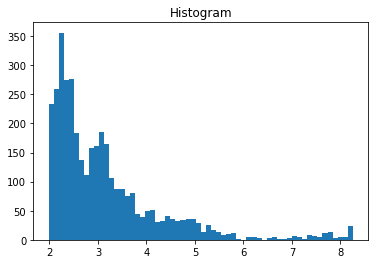

In [72]:
ds = xr.open_rasterio('/tmp/product/product/2020/09/01/twm-eo_20200901_100401_Oa08.tif')
offset = float(ds.offset)
scale = float(ds.scale)
dd = ds.isel(band=0).where(ds.isel(band=1))
# dd_unscaled = ((dd + offset) * scale)
dd_unscaled = (dd*scale) + offset
dd_unscaled.plot.hist(bins=60)

# plt.ylim(0, 900)
plt.show()
# (((ds_chl.isel(band=0)/1) + offset) / scale).plot.hist()

In [73]:
dsn = xr.open_dataset('/tmp/product/product/2020/09/01/twm-eo_20200901_100401_Oa08.nc')

(array([1.000e+01, 3.618e+03, 5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.06375347, -0.01553106,  0.03269135,  0.08091377,  0.12913618,
         0.17735859,  0.225581  ,  0.27380341,  0.32202583,  0.37024824,
         0.41847065,  0.46669306,  0.51491547,  0.56313788,  0.6113603 ,
         0.65958271,  0.70780512,  0.75

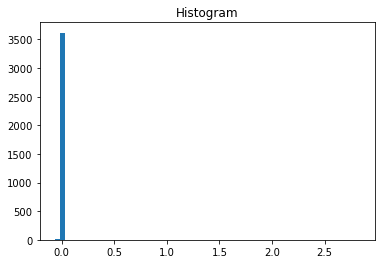

In [76]:
((dsn['Oa08'] - dd_unscaled)).plot.hist(bins=60)

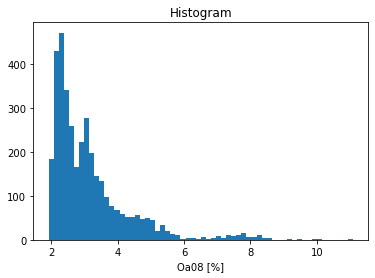

In [71]:
dsn['Oa08'].plot.hist(bins=60);

In [43]:
dsn['Oa08'].min()

<xarray.DataArray 'Oa08' ()>
array(1.9172791, dtype=float32)

(array([353., 635., 493., 394., 569., 414., 278., 272., 133., 104.]),
 array([ 0.        ,  3.08946663,  6.17893326,  9.2683999 , 12.35786653,
        15.44733316, 18.53679979, 21.62626642, 24.71573305, 27.80519969,
        30.89466632]),
 <BarContainer object of 10 artists>)

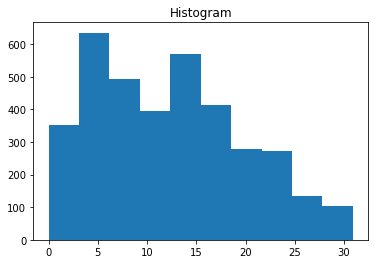

In [32]:
(dd / dsn['Oa08']).plot.hist()

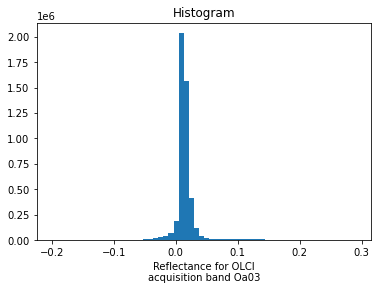

In [136]:
ds2 = xr.open_dataset("/data/tmp/s3_source/S3B_OL_2_WFR____20200831T110757_20200831T111057_20200831T131146_0180_043_037_1980_MAR_O_NR_002.SEN3/Oa03_reflectance.nc")
ds2.Oa03_reflectance.plot.hist(bins=60);

In [61]:
dd = ds_chl.isel(band=0)
offset = float(dd.offset)
scale = float(dd.scale)
1 * scale + offset

-1.9090937539642931

In [53]:
dd

<xarray.DataArray (y: 400, x: 400)>
array([[141, 120, 120, ...,   0,   0,   0],
       [139, 150, 140, ...,   0,   0,   0],
       [150, 150, 132, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
Coordinates:
    band     int64 1
  * y        (y) float64 5.985e+04 5.955e+04 5.925e+04 ... -5.955e+04 -5.985e+04
  * x        (x) float64 -5.985e+04 -5.955e+04 ... 5.955e+04 5.985e+04
Attributes:
    transform:         (300.0, 0.0, -60000.0, 0.0, -300.0, 60000.0)
    crs:               +proj=merc +lon_0=0 +k=1 +x_0=933300 +y_0=-7279200 +R=...
    res:               (300.0, 300.0)
    is_tiled:          0
    nodatavals:        (nan, nan)
    scales:            (1.0, 1.0)
    offsets:           (0.0, 0.0)
    AREA_OR_POINT:     Area
    offset:            -1.921259880065918
    scale:             0.012166126101624732
    TIFFTAG_DATETIME:  2020:08:31 11:07:56

In [16]:
for fn in glob('/data/tmp/chlor/twm-eo_*_chl_nn.tif'):
    print()

20200808_110004
20200809_110107
20200807_100208
20200731_110101
20200801_100405
20200805_110201
20200807_110300
20200803_100302
20200731_100100
20200802_100508
20200801_110204
20200806_100505
20200802_100109
20200805_100401


In [110]:
ds_chl

<xarray.DataArray (band: 2, y: 400, x: 400)>
[320000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 5.985e+04 5.955e+04 5.925e+04 ... -5.955e+04 -5.985e+04
  * x        (x) float64 -5.985e+04 -5.955e+04 ... 5.955e+04 5.985e+04
Attributes:
    transform:         (300.0, 0.0, -60000.0, 0.0, -300.0, 60000.0)
    crs:               +proj=merc +lon_0=0 +k=1 +x_0=933300 +y_0=-7279200 +R=...
    res:               (300.0, 300.0)
    is_tiled:          0
    nodatavals:        (nan, nan)
    scales:            (1.0, 1.0)
    offsets:           (0.0, 0.0)
    AREA_OR_POINT:     Area
    offset:            nan
    scale:             inf
    TIFFTAG_DATETIME:  2020:08:02 10:19:19

In [94]:
ds

<xarray.DataArray (band: 2, y: 400, x: 400)>
[320000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 5.985e+04 5.955e+04 5.925e+04 ... -5.955e+04 -5.985e+04
  * x        (x) float64 -5.985e+04 -5.955e+04 ... 5.955e+04 5.985e+04
Attributes:
    transform:         (300.0, 0.0, -60000.0, 0.0, -300.0, 60000.0)
    crs:               +proj=merc +lon_0=0 +k=1 +x_0=933300 +y_0=-7279200 +R=...
    res:               (300.0, 300.0)
    is_tiled:          0
    nodatavals:        (nan, nan)
    scales:            (1.0, 1.0)
    offsets:           (0.0, 0.0)
    AREA_OR_POINT:     Area
    offset:            nan
    scale:             inf
    TIFFTAG_DATETIME:  2020:08:05 10:41:46

In [85]:
ds

<xarray.DataArray (band: 2, y: 2000, x: 2000)>
[8000000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 2.998e+05 2.996e+05 2.992e+05 ... -2.996e+05 -2.998e+05
  * x        (x) float64 -2.998e+05 -2.996e+05 ... 2.996e+05 2.998e+05
Attributes:
    transform:         (300.0, 0.0, -300000.0, 0.0, -300.0, 300000.0)
    crs:               +proj=stere +lat_0=53 +lon_0=-7 +k=1 +x_0=0 +y_0=0 +a=...
    res:               (300.0, 300.0)
    is_tiled:          0
    nodatavals:        (nan, nan)
    scales:            (1.0, 1.0)
    offsets:           (0.0, 0.0)
    AREA_OR_POINT:     Area
    TIFFTAG_DATETIME:  2020:08:08 11:04:12

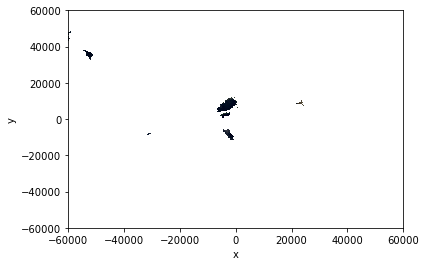

In [80]:
ds.plot.imshow(rgb='band')
plt.xlabel = None

In [61]:
ds.scale

'0.009819360807830212'

In [27]:
def apply_scaling(v, scale, offset, log10scaled):
    value = (v * scale) - offset
    if log10scaled:
        value = pow(10, value)
    return value

<xarray.DataArray (band: 2, y: 400, x: 400)>
[320000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 5.985e+04 5.955e+04 5.925e+04 ... -5.955e+04 -5.985e+04
  * x        (x) float64 -5.985e+04 -5.955e+04 ... 5.955e+04 5.985e+04
Attributes:
    transform:         (300.0, 0.0, -60000.0, 0.0, -300.0, 60000.0)
    crs:               +proj=merc +lon_0=0 +k=1 +x_0=933300 +y_0=-7279200 +R=...
    res:               (300.0, 300.0)
    is_tiled:          0
    nodatavals:        (nan, nan)
    scales:            (1.0, 1.0)
    offsets:           (0.0, 0.0)
    AREA_OR_POINT:     Area
    offset:            nan
    scale:             inf
    TIFFTAG_DATETIME:  2020:08:02 10:19:19

In [41]:
ds.offset

'nan'

In [29]:
ds

<xarray.DataArray (band: 2, y: 400, x: 400)>
[320000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 5.985e+04 5.955e+04 5.925e+04 ... -5.955e+04 -5.985e+04
  * x        (x) float64 -5.985e+04 -5.955e+04 ... 5.955e+04 5.985e+04
Attributes:
    transform:         (300.0, 0.0, -60000.0, 0.0, -300.0, 60000.0)
    crs:               +proj=merc +lon_0=0 +k=1 +x_0=933300 +y_0=-7279200 +R=...
    res:               (300.0, 300.0)
    is_tiled:          0
    nodatavals:        (nan, nan)
    scales:            (1.0, 1.0)
    offsets:           (0.0, 0.0)
    AREA_OR_POINT:     Area
    offset:            nan
    scale:             inf
    TIFFTAG_DATETIME:  2020:08:02 10:19:19